# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly as ply
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [4]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [5]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [6]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

      project_subject_categories project_subject_subcategories  \
473             Applied Learning             Early Development   
41558        Literacy & Language                      Literacy   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  
473                                               2                    1  
41558                                             2                    1

In [7]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [8]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   

        clean_categories clean_subcategories  \
473      AppliedLearning    EarlyDevelopment   
41558  Literacy_Language            Literacy   

                                                   essay  
473    I recently read an article about giving studen...  
41558  My students crave challenge, they eat obstacle...

In [12]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [13]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())
project_data['preprocessed_essays'] = preprocessed_essays

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [00:56<00:00, 880.37it/s]


### Number of words in combined Essay - Adding a new feature

In [20]:
# after preprocesing
proj_essay_wrd_count = []

for word in project_data['preprocessed_essays']:
    proj_essay_wrd_count.append(len(word.split()))
project_data['proj_essay_wrd_count'] = proj_essay_wrd_count

project_data.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   
29891           CA 2016-04-27 01:10:09             Grades 3-5   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   
29891      Breakout Box to Ignite Engagement!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   
29891  It's the end of the school year. Routines have...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   
29891  My students desire challenges, movement, and c...   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   
29891  I will design different clues using specific c...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   
29891  Donations to this project will immediately imp...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   
29891  My students need items from a \"Breakout Box\"...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   
29891                                             6                    1   

                  clean_categories         clean_subcategories  \
473                AppliedLearning            EarlyDevelopment   
41558            Literacy_Language                    Literacy   
29891  Math_Science History_Civics  Mathematics SocialSciences   

                                                   essay  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   
29891  It's the end of the school year. Routines have...   

                                     preprocessed_essays  proj_essay_wrd_count  
473    recently read article giving students choice l...                   114  
41558  students crave challenge eat obstacles breakfa...                   101  
29891  end school year routines run course students n...                   147

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [21]:
# printing some random essays.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])

Flexible Seating for Flexible Learning
Elmo for Math Instruction
Comfy Carpet for Creative Learning


In [22]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
project_data['preprocessed_titles'] = preprocessed_titles

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 18071.66it/s]


## Project title word count

In [23]:
proj_title_wrd_count = []

for word in project_data['preprocessed_titles']:
    proj_title_wrd_count.append(len(word.split()))
project_data['proj_title_wrd_count'] = proj_title_wrd_count
project_data.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   
29891           CA 2016-04-27 01:10:09             Grades 3-5   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   
29891      Breakout Box to Ignite Engagement!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   
29891  It's the end of the school year. Routines have...   

                                         project_essay_2  ...  \
473    I teach at a low-income (Title 1) school. Ever...  ...   
41558  We are an urban, public k-5 elementary school....  ...   
29891  My students desire challenges, movement, and c...  ...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   
29891  My students need items from a \"Breakout Box\"...   

      teacher_number_of_previously_posted_projects project_is_approved  \
473                                              2                   1   
41558                                            2                   1   
29891                                            6                   1   

                  clean_categories         clean_subcategories  \
473                AppliedLearning            EarlyDevelopment   
41558            Literacy_Language                    Literacy   
29891  Math_Science History_Civics  Mathematics SocialSciences   

                                                   essay  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   
29891  It's the end of the school year. Routines have...   

                                     preprocessed_essays proj_essay_wrd_count  \
473    recently read article giving students choice l...                  114   
41558  students crave challenge eat obstacles breakfa...                  101   
29891  end school year routines run course students n...                  147   

                      preprocessed_titles  proj_title_wrd_count  
473    flexible seating flexible learning                     4  
41558   going deep the art inner thinking                     6  
29891      breakout box ignite engagement                     4  

[3 rows x 22 columns]

## 1.4.1 Project_grade preprocessing

In [24]:
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(" ", "_")
project_data['project_grade_category'].value_counts()

Grades_PreK-2    20316
Grades_3-5       16968
Grades_6-8        7750
Grades_9-12       4966
Name: project_grade_category, dtype: int64

### Preprocessing teacher_prefix

In [25]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace(".","")

#Dropping the 2 rows from the data where the 'teacher_prefix' is NAN
project_data = project_data.dropna(subset=['teacher_prefix'])

project_data['teacher_prefix'].value_counts(dropna=False)

Mrs        26140
Ms         17936
Mr          4859
Teacher     1061
Dr             2
Name: teacher_prefix, dtype: int64

## 1.5 Preparing data for models

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'proj_essay_wrd_count', 'preprocessed_titles',
       'proj_title_wrd_count'],
      dtype='object')

we are going to consider

       
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - school_state : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - preprocessed_titles: text data
       - preprocessed_essays : text data

       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### Split data into Train and Test

In [27]:
Y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)

In [28]:
X = project_data
X.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3            Mrs   

    school_state                Date project_grade_category  \
473           GA 2016-04-27 00:53:00          Grades_PreK-2   

                              project_title  \
473  Flexible Seating for Flexible Learning   

                                       project_essay_1  \
473  I recently read an article about giving studen...   

                                       project_essay_2  ...  \
473  I teach at a low-income (Title 1) school. Ever...  ...   

                                       project_essay_4  \
473  Benjamin Franklin once said, \"Tell me and I f...   

                              project_resource_summary  \
473  My students need flexible seating in the class...   

    teacher_number_of_previously_posted_projects  clean_categories  \
473                                            2   AppliedLearning   

    clean_subcategories                                              essay  \
473    EarlyDevelopment  I recently read an article about giving studen...   

                                   preprocessed_essays proj_essay_wrd_count  \
473  recently read article giving students choice l...                  114   

                    preprocessed_titles proj_title_wrd_count  
473  flexible seating flexible learning                    4  

[1 rows x 21 columns]

In [29]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### One Hot Encode - Clean_Categories

In [352]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)


categories_one_hot_train = vectorizer.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)

print("Shape of Train data - one hot encoding ",categories_one_hot_train.shape)
print("Shape of Test data - one hot encoding ",categories_one_hot_test.shape)

f_nm_cat = vectorizer.get_feature_names()
print(f_nm_cat)

Shape of Train data - one hot encoding  (33498, 9)
Shape of Test data - one hot encoding  (16500, 9)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


### One Hot Encode - Clean_Sub-Categories

In [31]:
# we use count vectorizer to convert the values into one 

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

sub_cat_one_hot_train = vectorizer.transform(X_train['clean_subcategories'].values)
sub_cat_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)


print("Shape of Train data - one hot encoding ",sub_cat_one_hot_train.shape)
print("Shape of Test data - one hot encoding",sub_cat_one_hot_test.shape)

f_nm_subcat = vectorizer.get_feature_names()
print(f_nm_subcat)

Shape of Train data - one hot encoding  (33498, 30)
Shape of Test data - one hot encoding (16500, 30)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


### One Hot Encode - School_States

In [32]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [33]:
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [335]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)

school_state_one_hot_train = vectorizer.transform(X_train['school_state'].values)
school_state_one_hot_test = vectorizer.transform(X_test['school_state'].values)


print("Shape of Train data - one hot encoding",school_state_one_hot_train.shape)
print("Shape of Test data - one hot encoding",school_state_one_hot_test.shape)

f_nm_ss = vectorizer.get_feature_names()
print(f_nm_ss)

Shape of Train data - one hot encoding (33498, 51)
Shape of Test data - one hot encoding (16500, 51)
['VT', 'WY', 'ND', 'MT', 'RI', 'NH', 'SD', 'NE', 'AK', 'DE', 'WV', 'ME', 'NM', 'HI', 'DC', 'KS', 'ID', 'IA', 'AR', 'CO', 'MN', 'OR', 'MS', 'KY', 'NV', 'MD', 'TN', 'CT', 'AL', 'UT', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'MA', 'LA', 'WA', 'MO', 'IN', 'OH', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']


### One Hot Encode - Project_Grade_Category

In [35]:
my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())

In [36]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [37]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)

project_grade_cat_one_hot_train = vectorizer.transform(X_train['project_grade_category'].values)
project_grade_cat_one_hot_test = vectorizer.transform(X_test['project_grade_category'].values)


print("Shape of Train data - one hot encoding",project_grade_cat_one_hot_train.shape)
print("Shape of Test data - one hot encoding",project_grade_cat_one_hot_test.shape)

f_nm_pgc = vectorizer.get_feature_names()
print(f_nm_pgc)

Shape of Train data - one hot encoding (33498, 4)
Shape of Test data - one hot encoding (16500, 4)
['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']


### One Hot Encode - Teacher_Prefix

In [38]:
my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())

In [39]:
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))

In [329]:
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values.astype("U"))

teacher_prefix_cat_one_hot_train = vectorizer.transform(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_cat_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values.astype("U"))

print("Shape of Train data - one hot encoding",teacher_prefix_cat_one_hot_train.shape)
print("Shape of Test data - one hot encoding ",teacher_prefix_cat_one_hot_test.shape)

f_nm_tp = vectorizer.get_feature_names()
print(f_nm_tp)
teacher_prefix_cat_dict

Shape of Train data - one hot encoding (33498, 5)
Shape of Test data - one hot encoding  (16500, 5)
['Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']


{'Mrs': 26140, 'Ms': 17936, 'Mr': 4859, 'Teacher': 1061, 'Dr': 2}

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

#### BOW of eassys - Train/Test Data

In [41]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_essays'])

#BOW for essays Train Data
essay_bow_train = vectorizer.transform(X_train['preprocessed_essays'])
print("Shape of matrix for TRAIN data ",essay_bow_train.shape)
f_nm_bow_eassy_tr = vectorizer.get_feature_names()#Storing the names of the BOW train feature data.
print(f_nm_bow_eassy_tr[10:50])

#BOW for essays Test Data
essay_bow_test = vectorizer.transform(X_test['preprocessed_essays'])
print("Shape of matrix for TEST data",essay_bow_test.shape)

Shape of matrix for TRAIN data  (33498, 10351)
['115', '11th', '12', '120', '1200', '125', '12th', '13', '130', '14', '140', '1400', '15', '150', '1500', '15th', '16', '160', '1600', '17', '170', '18', '180', '1800', '19', '1950s', '1993', '1st', '20', '200', '2000', '2003', '2004', '2006', '2007', '2008', '2009', '2010', '2011', '2012']
Shape of matrix for TEST data (16500, 10351)


#### BOW of Project Titles - Train/Test Data¶

In [42]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_titles'])

# BOW for title Train Data
title_bow_train = vectorizer.transform(X_train['preprocessed_titles'])
print("Shape of matrix for TRAIN data ",title_bow_train.shape)
f_nm_bow_title_tr = vectorizer.get_feature_names()#Storing the names of the BOW train feature data.
print(f_nm_bow_title_tr[10:50])

# BOW for title Test Data
title_bow_test = vectorizer.transform(X_test['preprocessed_titles'])
print("Shape of matrix for TEST data",title_bow_test.shape)

Shape of matrix for TRAIN data  (33498, 1619)
['21st', '2nd', '3d', '3doodler', '3rd', '4th', '5th', '6th', '7th', '8th', 'abc', 'about', 'above', 'academic', 'access', 'accessible', 'accessing', 'accessories', 'achieve', 'achievement', 'achieving', 'across', 'act', 'action', 'active', 'actively', 'activities', 'activity', 'add', 'adding', 'advanced', 'adventure', 'adventures', 'after', 'again', 'age', 'ahead', 'air', 'algebra', 'alive']
Shape of matrix for TEST data (16500, 1619)


#### TFIDF vectorizer for essay

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_essays'])

#tidf Train Data
essay_tfidf_train = vectorizer.transform(X_train['preprocessed_essays'])
print("Shape of matrix for TRAIN data",essay_tfidf_train.shape)
f_nm_tidf_eassy_tr = vectorizer.get_feature_names()#Storing the names of the BOW train feature data.
print(f_nm_tidf_eassy_tr[10:50])

#tidf Test Data
essay_tfidf_test = vectorizer.transform(X_test['preprocessed_essays'])
print("Shape of matrix for TEST data",essay_tfidf_test.shape)

Shape of matrix for TRAIN data (33498, 10351)
['115', '11th', '12', '120', '1200', '125', '12th', '13', '130', '14', '140', '1400', '15', '150', '1500', '15th', '16', '160', '1600', '17', '170', '18', '180', '1800', '19', '1950s', '1993', '1st', '20', '200', '2000', '2003', '2004', '2006', '2007', '2008', '2009', '2010', '2011', '2012']
Shape of matrix for TEST data (16500, 10351)


#### TFIDF vectorizer for Title

In [44]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_titles'])

#tidf Train Data
title_tfidf_train = vectorizer.transform(X_train['preprocessed_titles'])
print("Shape of matrix for TRAIN data",title_tfidf_train.shape)
f_nm_tidf_title_tr = vectorizer.get_feature_names()#Storing the names of the BOW train feature data.
print(f_nm_tidf_title_tr[10:50])


#tidf Test Data
title_tfidf_test = vectorizer.transform(X_test['preprocessed_titles'])
print("Shape of matrix for TEST data",title_tfidf_test.shape)

Shape of matrix for TRAIN data (33498, 1619)
['21st', '2nd', '3d', '3doodler', '3rd', '4th', '5th', '6th', '7th', '8th', 'abc', 'about', 'above', 'academic', 'access', 'accessible', 'accessing', 'accessories', 'achieve', 'achievement', 'achieving', 'across', 'act', 'action', 'active', 'actively', 'activities', 'activity', 'add', 'adding', 'advanced', 'adventure', 'adventures', 'after', 'again', 'age', 'ahead', 'air', 'algebra', 'alive']
Shape of matrix for TEST data (16500, 1619)


### AVG- W2V vectorizer for Essay

In [189]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [190]:
# average Word2Vec Function
# compute average word2vec for each review.
# the avg-w2v for each sentence/review is stored in this list
def avg_w2v_vectors_func(sentance):
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    return vector

In [202]:
essay_avg_w2v_train = []
essay_avg_w2v_test  = []

for sentence in tqdm(X_train['preprocessed_essays']):
    essay_avg_w2v_train.append(avg_w2v_vectors_func(sentance)) # Avg-w2v for Train data
    
# Avg-w2v for Train data    
print("len(essay_avg_w2v_train):",len(essay_avg_w2v_train))
print("len(essay_avg_w2v_train[0])",len(essay_avg_w2v_train[0]))

for sentence in tqdm(X_test['preprocessed_essays']):
    essay_avg_w2v_test.append(avg_w2v_vectors_func(sentance)) # Avg-w2v for Test data

# Avg-w2v for Test data
print("len(essay_avg_w2v_test):",len(essay_avg_w2v_test))
print("len(essay_avg_w2v_test[0])",len(essay_avg_w2v_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 33498/33498 [00:15<00:00, 2114.75it/s]


len(essay_avg_w2v_train): 33498
len(essay_avg_w2v_train[0]) 300


100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:08<00:00, 1994.14it/s]


len(essay_avg_w2v_test): 16500
len(essay_avg_w2v_test[0]) 300


### AVG- W2V vectorizer for Titile

In [203]:
title_avg_w2v_train = []
title_avg_w2v_test  = []

for sentence in tqdm(X_train['preprocessed_titles']):
    title_avg_w2v_train.append(avg_w2v_vectors_func(sentance)) # Avg-w2v for Train data
    
# Avg-w2v for Train data    
print("len(title_avg_w2v_train):",len(title_avg_w2v_train))
print("len(title_avg_w2v_train[0])",len(title_avg_w2v_train[0]))


for sentence in tqdm(X_test['preprocessed_titles']):
    title_avg_w2v_test.append(avg_w2v_vectors_func(sentance)) # Avg-w2v for Test data

# Avg-w2v for Test data
print("len(title_avg_w2v_test):",len(title_avg_w2v_test))
print("len(title_avg_w2v_test[0])",len(title_avg_w2v_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 33498/33498 [00:00<00:00, 37710.42it/s]


len(title_avg_w2v_train): 33498
len(title_avg_w2v_train[0]) 300


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 36817.27it/s]


len(title_avg_w2v_test): 16500
len(title_avg_w2v_test[0]) 300


### TFIDF weighted W2V for Essay

In [49]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [50]:
# Compute  TFIDF weighted W2V for each sentence of the review.

def tf_idf_weight_func(sentence): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    return vector

In [51]:
essay_tfidf_w2v_train = []
essay_tfidf_w2v_test  = []

for sentence in tqdm(X_train['preprocessed_essays']):
    essay_tfidf_w2v_train.append(tf_idf_weight_func(sentance)) #  TFIDF weighted W2V for Train data
print("len(essay_tfidf_w2v_train)",len(essay_tfidf_w2v_train))
print("len(essay_tfidf_w2v_train[0])",len(essay_tfidf_w2v_train[0]))

for sentence in tqdm(X_test['preprocessed_essays']):
    essay_tfidf_w2v_test.append(tf_idf_weight_func(sentance)) #  TFIDF weighted W2V for Test data
print("len(essay_tfidf_w2v_test)",len(essay_tfidf_w2v_test))
print("len(essay_tfidf_w2v_test[0])",len(essay_tfidf_w2v_test[0]))

100%|████████████████████████████████████████████████████████████████████████| 33498/33498 [00:00<00:00, 140874.82it/s]


len(essay_tfidf_w2v_train) 33498
len(essay_tfidf_w2v_train[0]) 300


100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 148653.68it/s]


len(essay_tfidf_w2v_test) 16500
len(essay_tfidf_w2v_test[0]) 300


###  TFIDF weighted W2V for Titile

In [52]:
title_tfidf_w2v_train  = []
title_tfidf_w2v_test  = []

for sentence in tqdm(X_train['preprocessed_titles']):
    title_tfidf_w2v_train.append(tf_idf_weight_func(sentance)) #  TFIDF weighted W2V for Train data
print("len(title_tfidf_w2v_train)",len(title_tfidf_w2v_train))
print("len(title_tfidf_w2v_train[0])",len(title_tfidf_w2v_train[0]))

for sentence in tqdm(X_test['preprocessed_titles']):
    title_tfidf_w2v_test.append(tf_idf_weight_func(sentance)) #  TFIDF weighted W2V for Test data
print("len(title_tfidf_w2v_test)",len(title_tfidf_w2v_test))
print("len(title_tfidf_w2v_test[0])",len(title_tfidf_w2v_test[0]))

100%|████████████████████████████████████████████████████████████████████████| 33498/33498 [00:00<00:00, 135795.22it/s]


len(title_tfidf_w2v_train) 33498
len(title_tfidf_w2v_train[0]) 300


100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 128141.49it/s]


len(title_tfidf_w2v_test) 16500
len(title_tfidf_w2v_test[0]) 300


### 1.5.3 Vectorizing Numerical features

In [53]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(3)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21
2  p000003  298.97         4

In [54]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [55]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(-1,1))

price_data_train = normalizer.transform(X_train['price'].values.reshape(-1,1))

price_data_test = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print("="*100)
print(price_data_train.shape, Y_train.shape)
print(price_data_test.shape, Y_test.shape)

print("="*100)

After vectorizations
(33498, 1) (33498,)
(16500, 1) (16500,)


#### Vectorizing Quantity Feature

In [56]:
normalizer = Normalizer()

normalizer.fit(X_train['quantity'].values.reshape(-1,1))

quant_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
quant_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(quant_train.shape, Y_train.shape)
print(quant_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33498, 1) (33498,)
(16500, 1) (16500,)


####  Vectorizing teacher_number_of_previously_posted_projects 

In [57]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_no_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_no_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(prev_no_projects_train.shape, Y_train.shape)
print(prev_no_projects_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33498, 1) (33498,)
(16500, 1) (16500,)


### Vectorising the Word count of title feature

In [58]:
normalizer = Normalizer()

normalizer.fit(X_train['proj_title_wrd_count'].values.reshape(-1,1))

title_cnt_train = normalizer.transform(X_train['proj_title_wrd_count'].values.reshape(-1,1))
title_cnt_test = normalizer.transform(X_test['proj_title_wrd_count'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(title_cnt_train.shape, Y_train.shape)
print(title_cnt_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33498, 1) (33498,)
(16500, 1) (16500,)


### Vectorising the Word count of Essay feature

In [59]:
normalizer = Normalizer()

normalizer.fit(X_train['proj_title_wrd_count'].values.reshape(-1,1))

essay_cnt_train = normalizer.transform(X_train['proj_essay_wrd_count'].values.reshape(-1,1))
essay_cnt_test = normalizer.transform(X_test['proj_essay_wrd_count'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(essay_cnt_train.shape, Y_train.shape)
print(essay_cnt_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33498, 1) (33498,)
(16500, 1) (16500,)


# Assignment 8: Decision Tree

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Decision Tree</h1>

### 2.4.1 Applying Decision Tree  on BOW,<font color='red'> SET 1</font>

In [60]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,title_bow_train, essay_bow_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test, price_data_test, quant_test, prev_no_projects_test,title_bow_test, essay_bow_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)

print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33498, 12072) (33498,)
(16500, 12072) (16500,)


#### Best hyper prameter using the ROC/AUC higest value and K-fold cross validation.

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

parameters = {'max_depth':[1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10,50,100,500,100]}


clf = GridSearchCV(dt, parameters, cv= 10, scoring='roc_auc')

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
parm_max_depth = clf.cv_results_['param_max_depth']
param_min_samples_split = clf.cv_results_['param_min_samples_split']

#Summary of the grid search
print('Best Score: ', clf.best_score_)
print('Best Params: ', clf.best_params_)

Best Score:  0.6073548840135227
Best Params:  {'max_depth': 10, 'min_samples_split': 500}


### Heatmap for the hyperparameters along with the AUC score.

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.282237      0.055584         0.018510        0.004277   
1       0.304157      0.022946         0.020130        0.006250   
2       0.323103      0.051143         0.017492        0.002405   

  param_max_depth param_min_samples_split  \
0               1                       5   
1               1                      10   
2               1                      50   

                                      params  split0_test_score  \
0   {'max_depth': 1, 'min_samples_split': 5}           0.556841   
1  {'max_depth': 1, 'min_samples_split': 10}           0.556841   
2  {'max_depth': 1, 'min_samples_split': 50}           0.556841   

   split1_test_score  split2_test_score  ...  split2_train_score  \
0           0.559461           0.527658  ...            0.556268   
1           0.559461           0.527658  ...            0.556268   
2           0.559461           0.527658  ...            0.556268   

   split3_train_score  split4_train_score  split5_train_score  \
0            0.554207            0.554193            0.553158   
1            0.554207            0.554193            0.553158   
2            0.554207            0.554193            0.553158   

   split6_train_score  split7_train_score  split8_train_score  \
0            0.551015            0.551445             0.55397   
1            0.551015            0.551445             0.55397   
2            0.551015            0.551445             0.55397   

   split9_train_score  mean_train_score  std_train_score  
0            0.554046          0.553406         0.001428  
1            0.554046          0.553406         0.001428  
2            0.554046          0.553406         0.001428  

[3 rows x 32 columns]

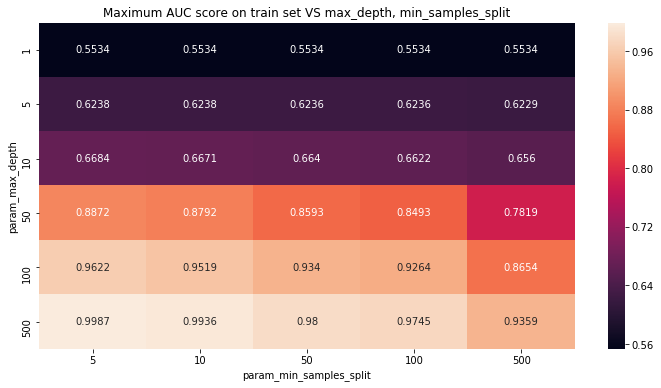

In [91]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
    
df_gridsearch = pd.DataFrame(clf.cv_results_)

#Maximum AUC score on train set VS max_depth, min_samples_split
max_scores = df_gridsearch.groupby(['param_max_depth',
                                    'param_min_samples_split']).max().unstack()[['mean_test_score', 'mean_train_score']]
plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on train set VS max_depth, min_samples_split'

sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

df_gridsearch.head(3)

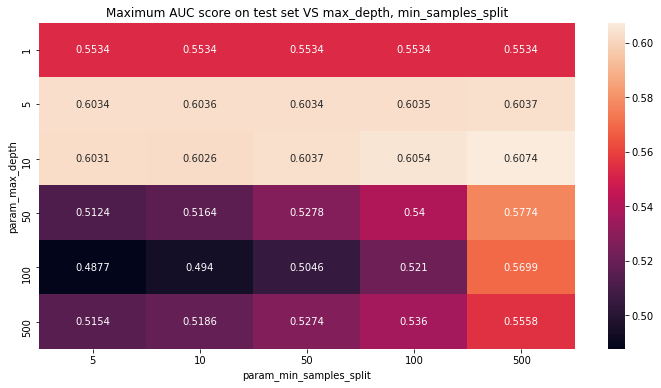

In [92]:
#Maximum AUC score on test set VS max_depth, min_samples_split

plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on test set VS max_depth, min_samples_split'

sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

### 3D-Scatter plot using offline plotly for train and test set: X-axis :max_depth ,Y-axis : min_samples_split and Z-axis : AUC score.

In [93]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb

from plotly import plotly as ply
import plotly.offline as pyo
import plotly.graph_objs as go

data = [
        go.Scatter3d(
            x=df_gridsearch['param_min_samples_split'],
            y=df_gridsearch['param_max_depth'],
            z=df_gridsearch[f'mean_{set_name}_score'],
            mode='markers', 
            marker=dict(
                size=5,
                color=df_gridsearch[f'mean_{set_name}_score'],
                opacity=0.99,
                colorscale='Viridis',
                colorbar=dict(title = f'{set_name.capitalize()} score'),
                line=dict(color='rgb(140, 140, 170)'),
                showscale=False,

            ),
            text=df_gridsearch.params,
            hoverinfo='text+name',
            name=f'{set_name.capitalize()} set',
        )
    
    for set_name in ['train', 'test']
]
layout = go.Layout(
    margin=dict(
        l=20,
        r=20,
        b=20,
        t=20
    ),
#     height=600,
#     width=960,
    scene = dict(
        xaxis = dict(
            title='param_min_samples_split',
        ),
        yaxis = dict(
            title='param_max_depth',
            type='log'
        ),
        zaxis = dict(
            title='AUC score',
            type='log'
        ),
        camera = dict(
            eye = dict(
                y = 2.089757339892154,
                x = -0.5464711077183096,
                z = 0.14759264478960377,
                )
            ),
    ),
 
)

fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

### Best Train Model using best Hyper parameter.

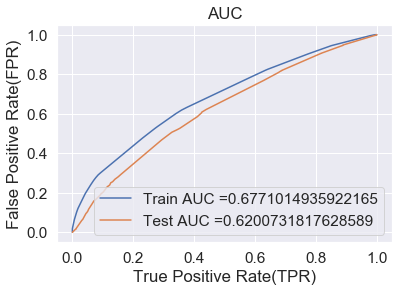

In [88]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500,class_weight='balanced')

clf = dtree.fit(X_train_merge, Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = dtree.predict_proba(X_train_merge)[:,1]    
y_test_pred = dtree.predict_proba(X_test_merge)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Print the decision Tree using Graphviz

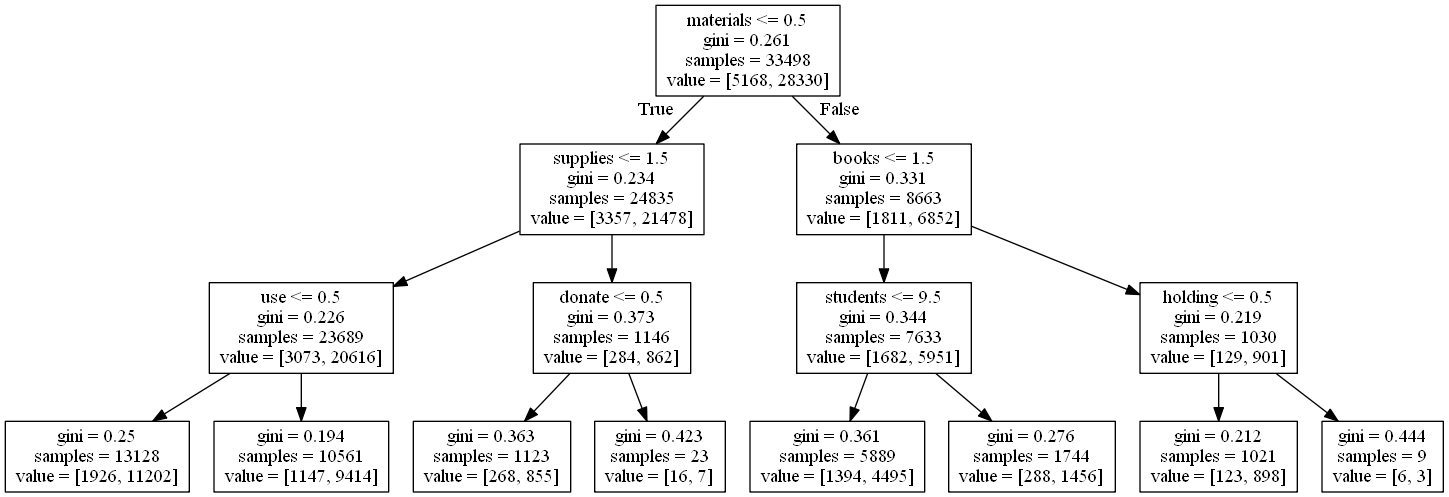

In [89]:
from itertools import chain 
import graphviz
from sklearn import tree
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

dtree = DecisionTreeClassifier(max_depth=3)
clf = dtree.fit(X_train_merge, Y_train)

feature_names_bow = []
#https://www.geeksforgeeks.org/python-append-multiple-lists-at-once/
feature_names_bow = list(chain(f_nm_cat,f_nm_subcat,f_nm_ss,f_nm_pgc,f_nm_tp,["Price","Quantity","Prec_no_projts"],f_nm_bow_title_tr,f_nm_bow_eassy_tr))

# Print the decision Tree using pydot ---Since the Graphviz didnot work for me because of some issue with the path variable.

#https://stackoverflow.com/questions/45569763/attributeerror-list-object-has-no-attribute-create-png?rq=1
#https://stackoverflow.com/questions/31209016/python-pydot-and-decisiontree
    
dot_data = StringIO() 
tree_viz = tree.export_graphviz(dtree, out_file=dot_data, feature_names=feature_names_bow)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Confusion Matrix

In [90]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [91]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3966181005814926 for threshold 0.491
[[ 3326  1842]
 [10871 17459]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3494953568120413 for threshold 0.472
[[1463 1083]
 [5467 8487]]


### Confusion Matrix -Heat map - Train

the maximum value of tpr*(1-fpr) 0.3966181005814926 for threshold 0.491


Text(26.5, 0.5, 'Actual Label')

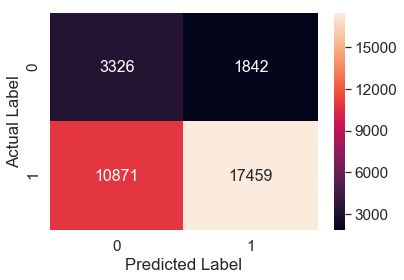

In [92]:
conf_mat_BOW_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_mat_BOW_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix -Heat map - Test

the maximum value of tpr*(1-fpr) 0.24638867925226887 for threshold 0.439


Text(26.5, 0.5, 'Actual Label')

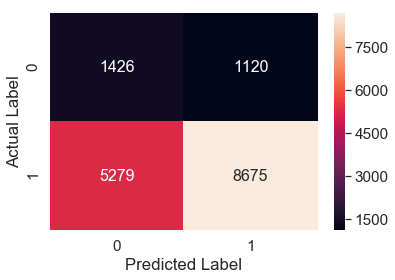

In [93]:
conf_mat_BOW_test= pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_mat_BOW_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### False Positive datapoints from the BOW

In [170]:
import numpy as np

fp_rows = []
y_train_label = []


for i in range(len(y_train_pred)):
    if (y_train_pred[i] >= 0.491): #Checking for the threshold value above is set as 1 and rest as 0.
        
        y_train_label.append(1)
        
        #Comparing the false of Y_train and the positive of y_train_predict
        if (Y_train[i] == 0 and y_train_label[i] == 1):
        
        #Appending the index of rows matched the condition for FP    
            fp_rows.append(i)
    else:
        y_train_label.append(0)

In [139]:
tp_freq = {}

df_bow = pd.DataFrame(X_train_merge.todense())
df_bow_fp = df_bow.iloc[fp_rows,:]
df_bow_fp.columns = feature_names_bow
df_bow_fp.head(3)

#Convert the series output of the summ() on the dataframe to a dictionary with frequenncy for the world cloud generate.
#https://www.geeksforgeeks.org/python-pandas-series-to_dict/

tp_freq = (df_bow_fp.sum()).to_dict()

### Wordcloud of the false positive datapoints

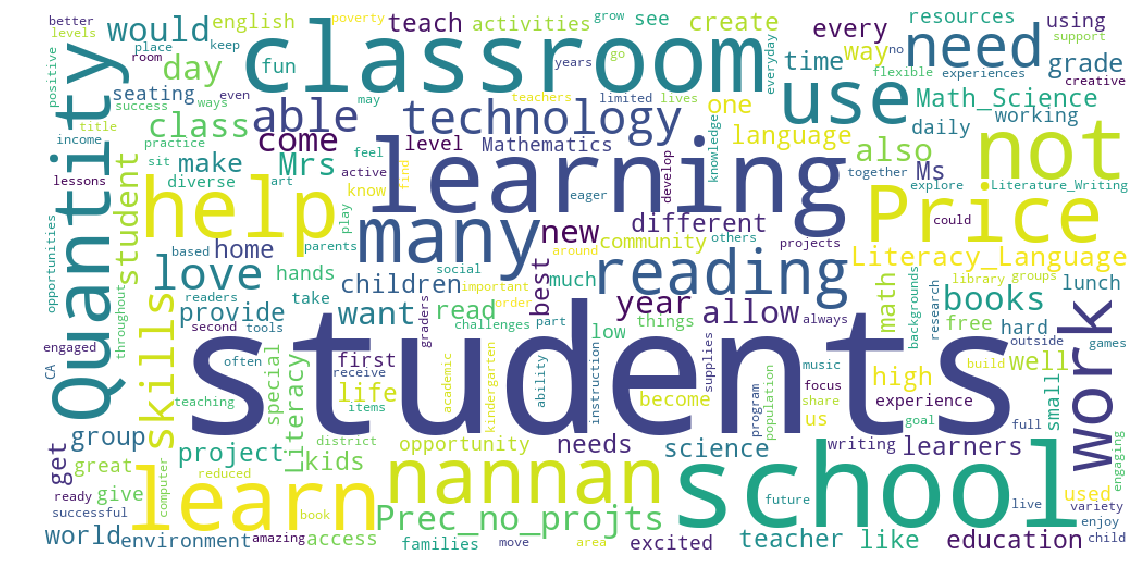

In [140]:
from wordcloud import WordCloud
#https://stackoverflow.com/questions/43606339/generate-word-cloud-from-single-column-pandas-dataframe

wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate_from_frequencies(tp_freq)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

### Box plot on the false positive

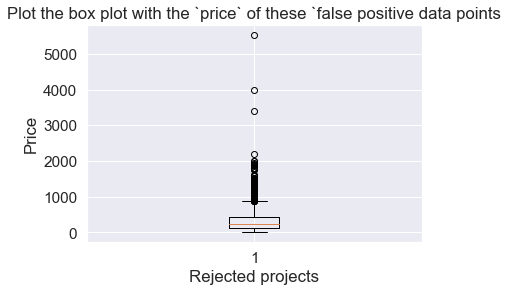

In [161]:
X_train['price'][fp_rows]
plt.boxplot(X_train['price'][fp_rows])
plt.title('Plot the box plot with the `price` of these `false positive data points')
plt.xlabel('Rejected projects')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

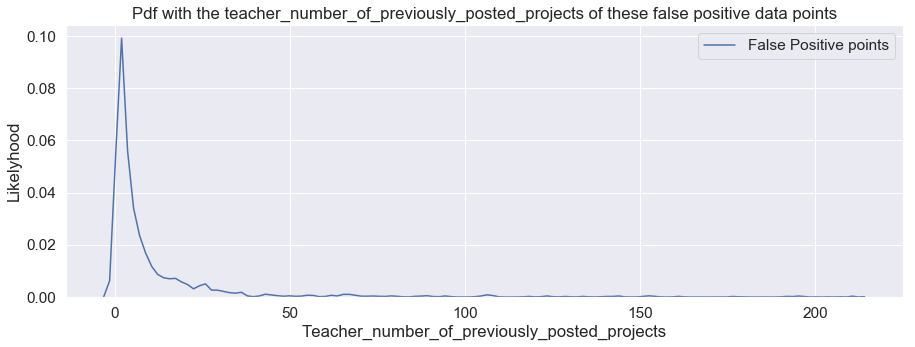

In [167]:
X_train['teacher_number_of_previously_posted_projects'][fp_rows]
plt.figure(figsize=(15,5))
sns.distplot(X_train['teacher_number_of_previously_posted_projects'][fp_rows], hist=False, label="False Positive points")
plt.title('Pdf with the teacher_number_of_previously_posted_projects of these false positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Likelyhood')
plt.legend()
plt.show()

## 2.4.2 Applying Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [168]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,title_tfidf_train, essay_tfidf_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test, price_data_test, quant_test, prev_no_projects_test,title_tfidf_test, essay_tfidf_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33498, 12072) (33498,)
(16500, 12072) (16500,)


### Best Hyperparameter using the grid search

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

parameters = {'max_depth':[1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10,50,100,500,100]}


clf = GridSearchCV(dt, parameters, cv= 10, scoring='roc_auc')

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
parm_max_depth = clf.cv_results_['param_max_depth']
param_min_samples_split = clf.cv_results_['param_min_samples_split']

#Summary of the grid search
print('Best Score: ', clf.best_score_)
print('Best Params: ', clf.best_params_)

Best Score:  0.6132519186264225
Best Params:  {'max_depth': 10, 'min_samples_split': 500}


### Heatmap for the hyperparameters along with the AUC score for train.

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.737992      0.091666         0.019206        0.004565   
1       0.756546      0.083439         0.017441        0.005277   
2       0.793377      0.079748         0.020972        0.003284   

  param_max_depth param_min_samples_split  \
0               1                       5   
1               1                      10   
2               1                      50   

                                      params  split0_test_score  \
0   {'max_depth': 1, 'min_samples_split': 5}           0.550547   
1  {'max_depth': 1, 'min_samples_split': 10}           0.550547   
2  {'max_depth': 1, 'min_samples_split': 50}           0.550547   

   split1_test_score  split2_test_score  ...  split2_train_score  \
0           0.541836           0.551676  ...            0.553282   
1           0.541836           0.551676  ...            0.553282   
2           0.541836           0.551676  ...            0.553282   

   split3_train_score  split4_train_score  split5_train_score  \
0            0.557861            0.552021            0.555251   
1            0.557861            0.552021            0.555251   
2            0.557861            0.552021            0.555251   

   split6_train_score  split7_train_score  split8_train_score  \
0            0.551913            0.556231            0.559219   
1            0.551913            0.556231            0.559219   
2            0.551913            0.556231            0.559219   

   split9_train_score  mean_train_score  std_train_score  
0            0.556257          0.554842         0.002384  
1            0.556257          0.554842         0.002384  
2            0.556257          0.554842         0.002384  

[3 rows x 32 columns]

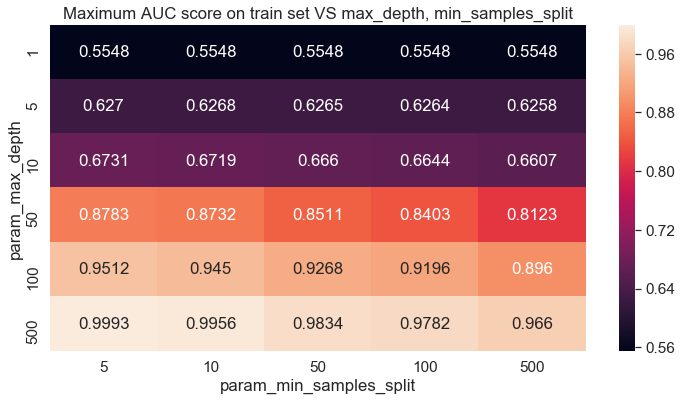

In [171]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
    
df_gridsearch = pd.DataFrame(clf.cv_results_)

#Maximum AUC score on train set VS max_depth, min_samples_split
max_scores = df_gridsearch.groupby(['param_max_depth',
                                    'param_min_samples_split']).max().unstack()[['mean_test_score', 'mean_train_score']]
plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on train set VS max_depth, min_samples_split'

sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

df_gridsearch.head(3)

### Heatmap for the hyperparameters along with the AUC score for test.

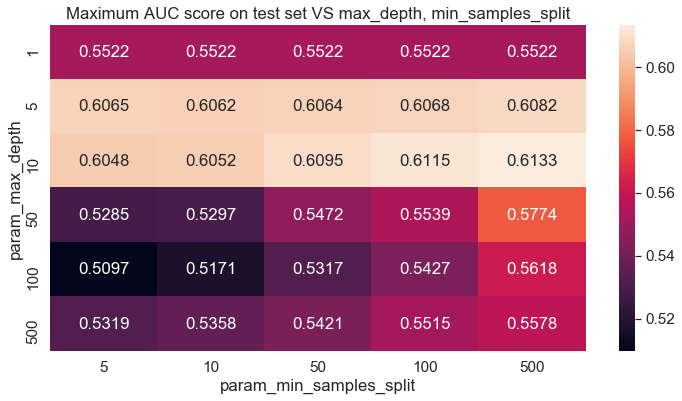

In [172]:
#Maximum AUC score on test set VS max_depth, min_samples_split

plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on test set VS max_depth, min_samples_split'

sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

#### Train Model using the best value of the hyper parameter

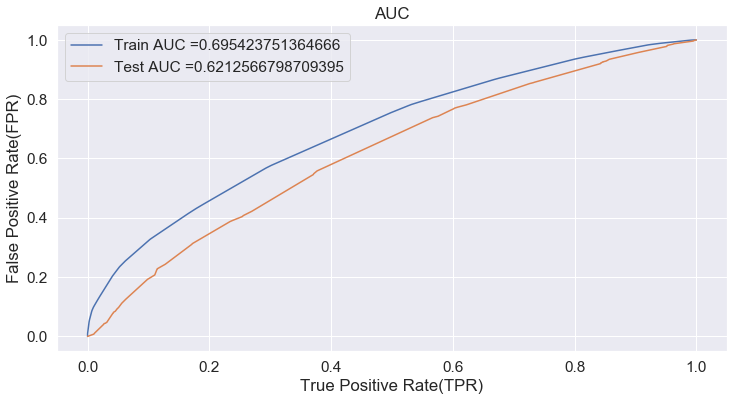

In [173]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500,class_weight='balanced')

clf = dtree.fit(X_train_merge, Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = dtree.predict_proba(X_train_merge)[:,1]    
y_test_pred = dtree.predict_proba(X_test_merge)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Print the decision Tree using Graphviz

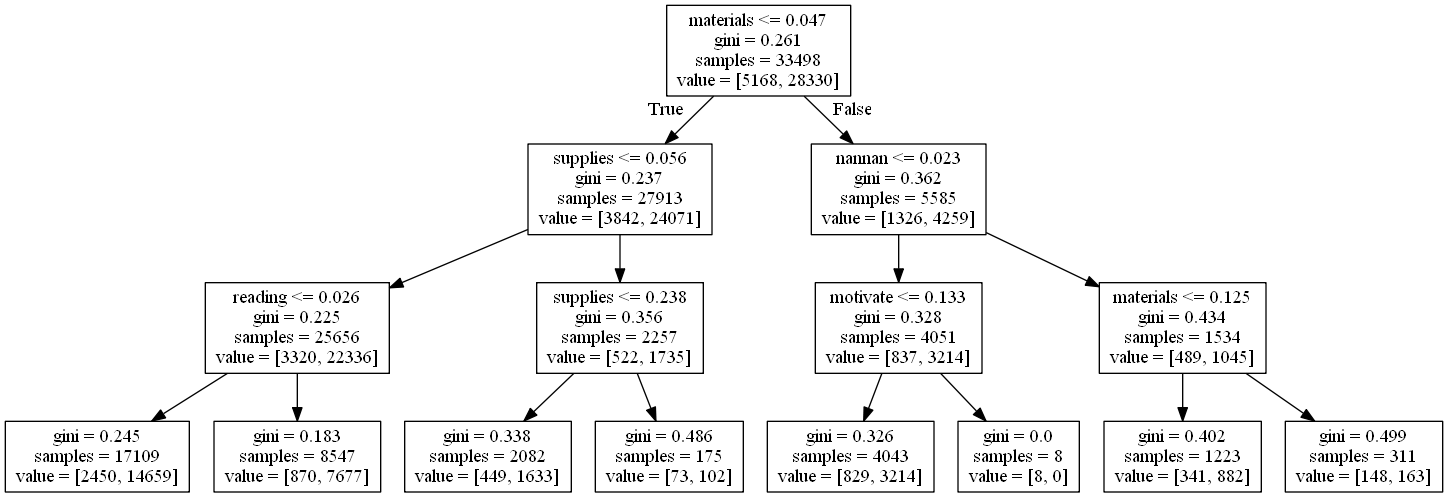

In [174]:
from itertools import chain 
import graphviz
from sklearn import tree
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

dtree = DecisionTreeClassifier(max_depth=3)
clf = dtree.fit(X_train_merge, Y_train)

feature_names_tfidf = []
#https://www.geeksforgeeks.org/python-append-multiple-lists-at-once/
feature_names_tfidf = list(chain(f_nm_cat,f_nm_subcat,f_nm_ss,f_nm_pgc,f_nm_tp,["Price","Quantity","Prec_no_projts"],f_nm_tidf_title_tr,f_nm_tidf_eassy_tr))

# Print the decision Tree using pydot ---Since the Graphviz didnot work for me because of some issue with the path variable.

#https://stackoverflow.com/questions/45569763/attributeerror-list-object-has-no-attribute-create-png?rq=1
#https://stackoverflow.com/questions/31209016/python-pydot-and-decisiontree
    
dot_data = StringIO() 
tree_viz = tree.export_graphviz(dtree, out_file=dot_data, feature_names=feature_names_tfidf)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Confusion Matrix

In [175]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2499969672262746 for threshold 0.475
[[ 2593  2575]
 [ 6955 21375]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24554157932378873 for threshold 0.475
[[ 1103  1443]
 [ 3661 10293]]


### Confusion Matrix - Heat map -train.

the maximum value of tpr*(1-fpr) 0.2499969672262746 for threshold 0.475


Text(80.5, 0.5, 'Actual Label')

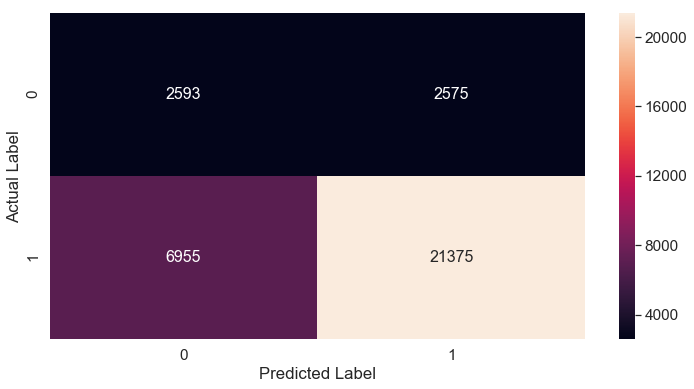

In [176]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

#### Confusion Matrix - Heat map - TEST data.

the maximum value of tpr*(1-fpr) 0.24554157932378873 for threshold 0.475


Text(80.5, 0.5, 'Actual Label')

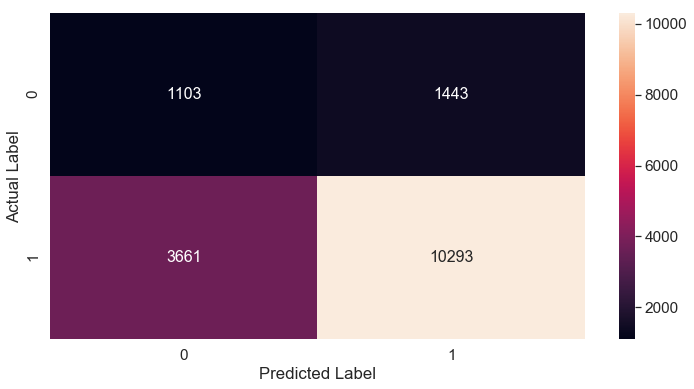

In [177]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Word cloud for the false positive points

In [219]:
import numpy as np

fp_rows = []
y_train_label = []


for i in range(len(y_train_pred)):
    if (y_train_pred[i] >= 0.491): #Checking for the threshold value above is set as 1 and rest as 0.
        
        y_train_label.append(1)
        
        #Comparing the false of Y_train and the positive of y_train_predict
        if (Y_train[i] == 0 and y_train_label[i] == 1):
        
        #Appending the index of rows matched the condition for FP    
            fp_rows.append(i)
    else:
        y_train_label.append(0)

tp_freq = {}

df_tfidf = pd.DataFrame(X_train_merge.todense())
df_tfidf_fp = df_tfidf.iloc[fp_rows,:]
df_tfidf_fp.columns = feature_names_tfidf
df_tfidf_fp.head(3)

#Convert the series output of the summ() on the dataframe to a dictionary with frequenncy for the world cloud generate.
#https://www.geeksforgeeks.org/python-pandas-series-to_dict/

tp_freq = (df_tfidf_fp.sum()).to_dict()

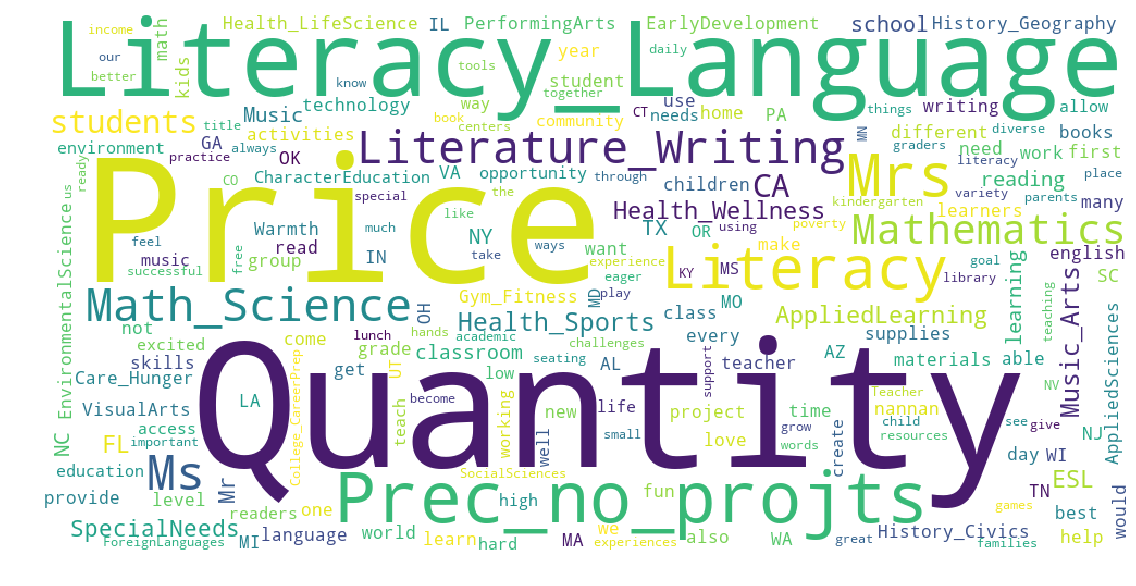

In [220]:
from wordcloud import WordCloud
#https://stackoverflow.com/questions/43606339/generate-word-cloud-from-single-column-pandas-dataframe

wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate_from_frequencies(tp_freq)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

### Box Plot for the false positive points of the PRICE.

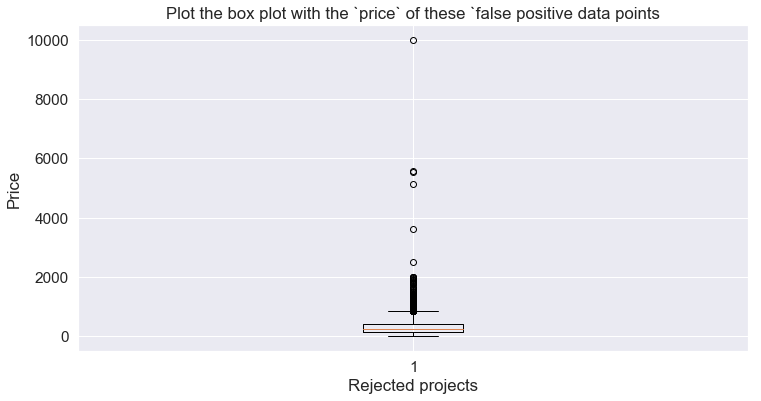

In [182]:
X_train['price'][fp_rows]
plt.boxplot(X_train['price'][fp_rows])
plt.title('Plot the box plot with the `price` of these `false positive data points')
plt.xlabel('Rejected projects')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### PDF with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

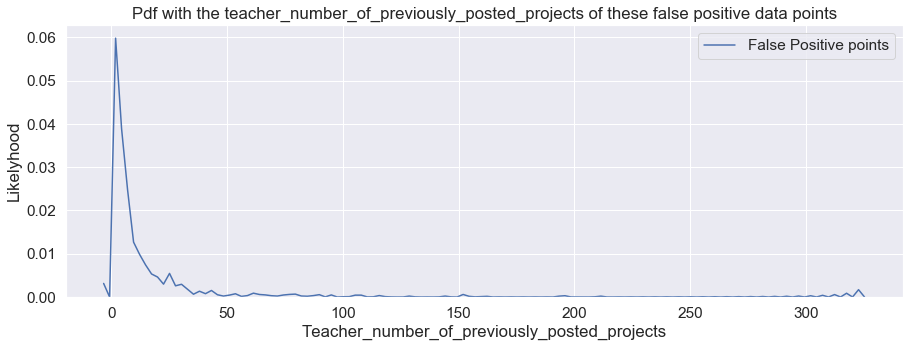

In [183]:
X_train['teacher_number_of_previously_posted_projects'][fp_rows]
plt.figure(figsize=(15,5))
sns.distplot(X_train['teacher_number_of_previously_posted_projects'][fp_rows], hist=False, label="False Positive points")
plt.title('Pdf with the teacher_number_of_previously_posted_projects of these false positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('Likelyhood')
plt.legend()
plt.show()

# 2.4.3 Applying Decision Tree on AVG-W2V , SET 3

In [196]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,title_avg_w2v_train, essay_avg_w2v_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test, price_data_test, quant_test, prev_no_projects_test,title_avg_w2v_test, essay_avg_w2v_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33498, 702) (33498,)
(16500, 702) (16500,)


### Best Hyper Parameter using the Grid Search.

In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

parameters = {'max_depth':[1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10,50,100,500,100]}


clf = GridSearchCV(dt, parameters, cv= 10, scoring='roc_auc')

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
parm_max_depth = clf.cv_results_['param_max_depth']
param_min_samples_split = clf.cv_results_['param_min_samples_split']

#Summary of the grid search
print('Best Score: ', clf.best_score_)
print('Best Params: ', clf.best_params_)

Best Score:  0.60687760585359
Best Params:  {'max_depth': 5, 'min_samples_split': 500}


### Hyper Prameters heatmap for train data

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.776281      0.204856         0.061464        0.005034   
1       2.733772      0.132163         0.060058        0.004000   
2       2.680129      0.191157         0.059556        0.003964   

  param_max_depth param_min_samples_split  \
0               1                       5   
1               1                      10   
2               1                      50   

                                      params  split0_test_score  \
0   {'max_depth': 1, 'min_samples_split': 5}           0.556446   
1  {'max_depth': 1, 'min_samples_split': 10}           0.556446   
2  {'max_depth': 1, 'min_samples_split': 50}           0.556446   

   split1_test_score  split2_test_score  ...  split2_train_score  \
0           0.573318            0.53224  ...            0.558699   
1           0.573318            0.53224  ...            0.558699   
2           0.573318            0.53224  ...            0.558699   

   split3_train_score  split4_train_score  split5_train_score  \
0            0.557393            0.557422            0.555663   
1            0.557393            0.557422            0.555663   
2            0.557393            0.557422            0.555663   

   split6_train_score  split7_train_score  split8_train_score  \
0            0.556456            0.552508            0.563985   
1            0.556456            0.552508            0.563985   
2            0.556456            0.552508            0.563985   

   split9_train_score  mean_train_score  std_train_score  
0            0.555563          0.556779         0.002918  
1            0.555563          0.556779         0.002918  
2            0.555563          0.556779         0.002918  

[3 rows x 32 columns]

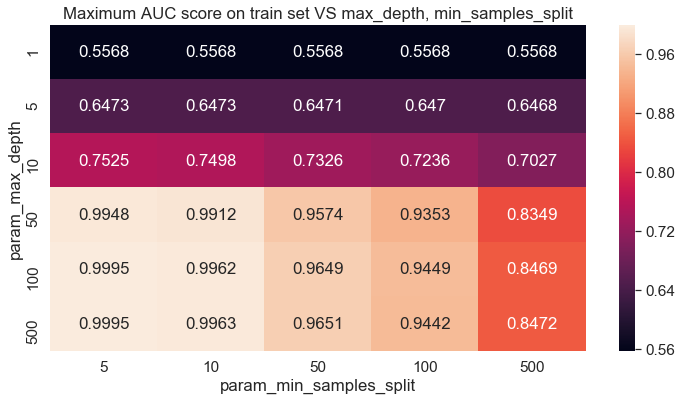

In [186]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
    
df_gridsearch = pd.DataFrame(clf.cv_results_)

#Maximum AUC score on train set VS max_depth, min_samples_split
max_scores = df_gridsearch.groupby(['param_max_depth',
                                    'param_min_samples_split']).max().unstack()[['mean_test_score', 'mean_train_score']]
plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on train set VS max_depth, min_samples_split'

sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

df_gridsearch.head(3)

### Hyper Prameters heatmap for test data

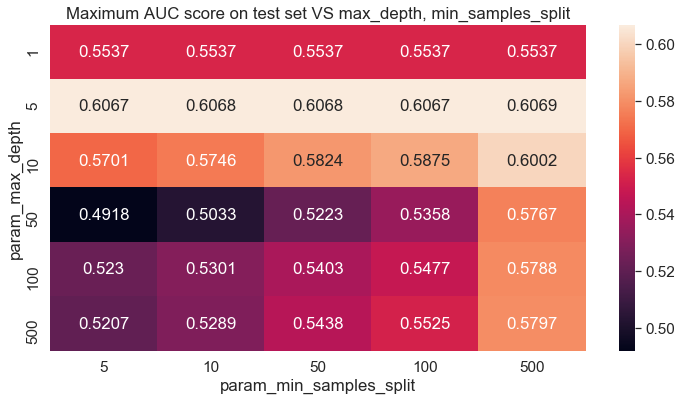

In [187]:
#Maximum AUC score on test set VS max_depth, min_samples_split

plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on test set VS max_depth, min_samples_split'

sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

### Train the model using the best hyperparameter

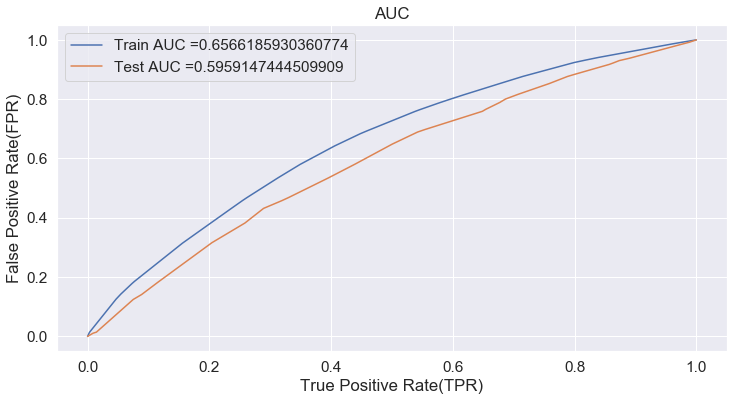

In [188]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 5, min_samples_split = 500,class_weight='balanced')

clf = dtree.fit(X_train_merge, Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = dtree.predict_proba(X_train_merge)[:,1]    
y_test_pred = dtree.predict_proba(X_test_merge)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [204]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24861975098007266 for threshold 0.454
[[ 2392  2776]
 [ 6853 21477]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999984572938835 for threshold 0.523
[[1272 1274]
 [4906 9048]]


### Confusion Matrix - Heat map - Train

the maximum value of tpr*(1-fpr) 0.24861975098007266 for threshold 0.454


Text(80.5, 0.5, 'Actual Label')

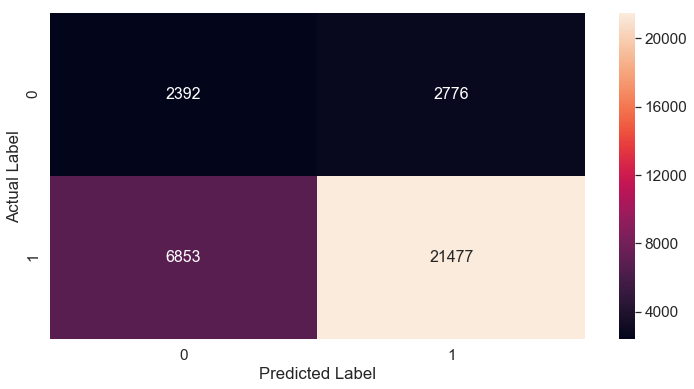

In [205]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix - Heat Map -Test

the maximum value of tpr*(1-fpr) 0.24999984572938835 for threshold 0.523


Text(80.5, 0.5, 'Actual Label')

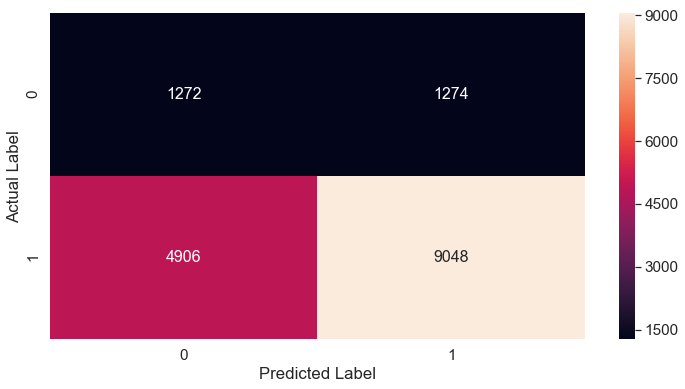

In [206]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# 2.4.4 Applying Decision Tree on TFIDF W2V , SET 4

In [207]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,title_tfidf_w2v_train, essay_tfidf_w2v_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test, price_data_test, quant_test, prev_no_projects_test,title_tfidf_w2v_test, essay_tfidf_w2v_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33498, 702) (33498,)
(16500, 702) (16500,)


### Finding the best Hyper Parameter - Grid Search

In [208]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

parameters = {'max_depth':[1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10,50,100,500,100]}


clf = GridSearchCV(dt, parameters, cv= 10, scoring='roc_auc')

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
parm_max_depth = clf.cv_results_['param_max_depth']
param_min_samples_split = clf.cv_results_['param_min_samples_split']

#Summary of the grid search
print('Best Score: ', clf.best_score_)
print('Best Params: ', clf.best_params_)

Best Score:  0.5535380782509927
Best Params:  {'max_depth': 10, 'min_samples_split': 500}


### Hyper Prameters heatmap for train data 

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.019017      0.003498         0.003399        0.001601   
1       0.021504      0.002100         0.003320        0.001584   
2       0.019100      0.001697         0.004304        0.000331   

  param_max_depth param_min_samples_split  \
0               1                       5   
1               1                      10   
2               1                      50   

                                      params  split0_test_score  \
0   {'max_depth': 1, 'min_samples_split': 5}           0.506698   
1  {'max_depth': 1, 'min_samples_split': 10}           0.506698   
2  {'max_depth': 1, 'min_samples_split': 50}           0.506698   

   split1_test_score  split2_test_score  ...  split2_train_score  \
0           0.536647           0.521335  ...            0.530237   
1           0.536647           0.521335  ...            0.530237   
2           0.536647           0.521335  ...            0.530237   

   split3_train_score  split4_train_score  split5_train_score  \
0            0.532115            0.532424            0.529865   
1            0.532115            0.532424            0.529865   
2            0.532115            0.532424            0.529865   

   split6_train_score  split7_train_score  split8_train_score  \
0            0.529016            0.528366            0.527492   
1            0.529016            0.528366            0.527492   
2            0.529016            0.528366            0.527492   

   split9_train_score  mean_train_score  std_train_score  
0            0.529658          0.529675         0.001499  
1            0.529658          0.529675         0.001499  
2            0.529658          0.529675         0.001499  

[3 rows x 32 columns]

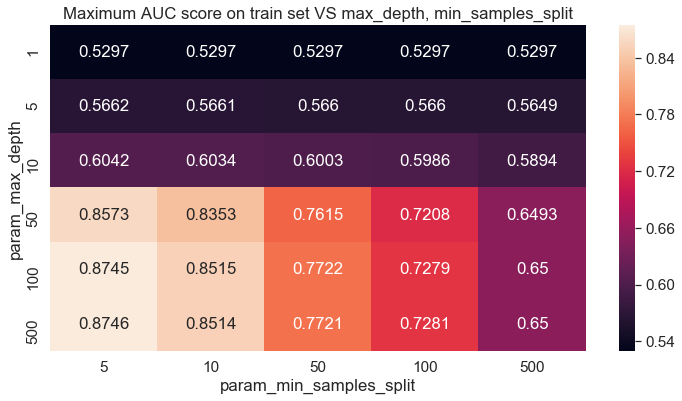

In [209]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
    
df_gridsearch = pd.DataFrame(clf.cv_results_)

#Maximum AUC score on train set VS max_depth, min_samples_split
max_scores = df_gridsearch.groupby(['param_max_depth',
                                    'param_min_samples_split']).max().unstack()[['mean_test_score', 'mean_train_score']]
plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on train set VS max_depth, min_samples_split'

sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

df_gridsearch.head(3)

### Hyper Prameters heatmap for test data

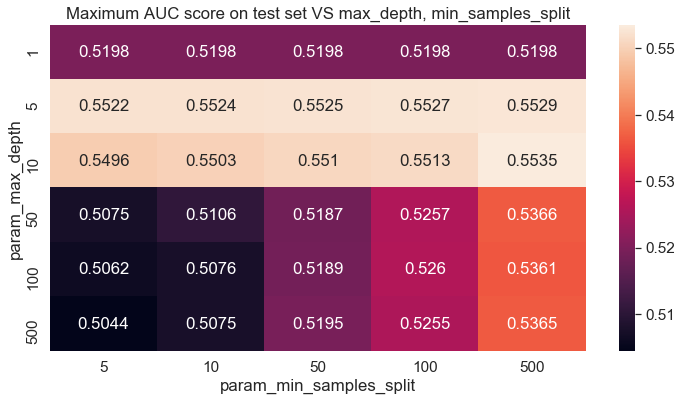

In [210]:
#Maximum AUC score on test set VS max_depth, min_samples_split

plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on test set VS max_depth, min_samples_split'

sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

### Train the model using the best Hyperparameter

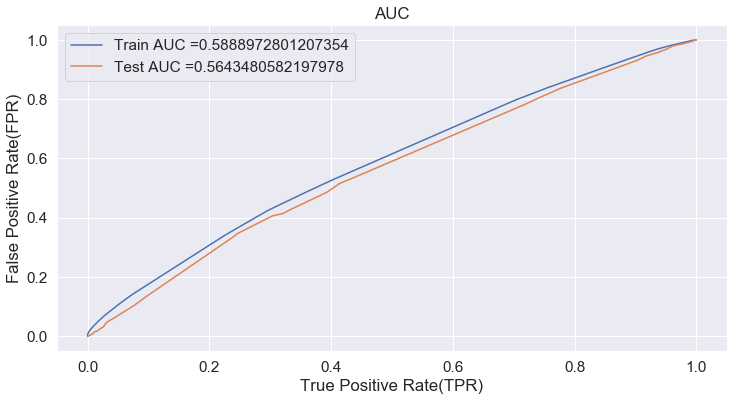

In [211]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500,class_weight='balanced')

clf = dtree.fit(X_train_merge, Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = dtree.predict_proba(X_train_merge)[:,1]    
y_test_pred = dtree.predict_proba(X_test_merge)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [212]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24144518182863828 for threshold 0.483
[[ 3062  2106]
 [13242 15088]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24500163218307108 for threshold 0.483
[[1453 1093]
 [6580 7374]]


### Confusion Matrix - HeatMap - Train

the maximum value of tpr*(1-fpr) 0.24144518182863828 for threshold 0.483


Text(80.5, 0.5, 'Actual Label')

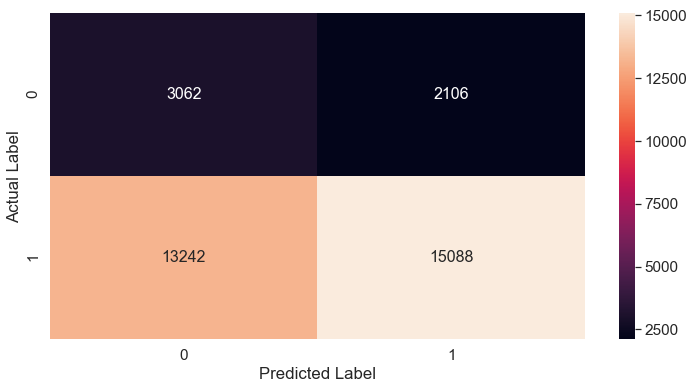

In [213]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix - HeatMap - Test

the maximum value of tpr*(1-fpr) 0.24500163218307108 for threshold 0.483


Text(80.5, 0.5, 'Actual Label')

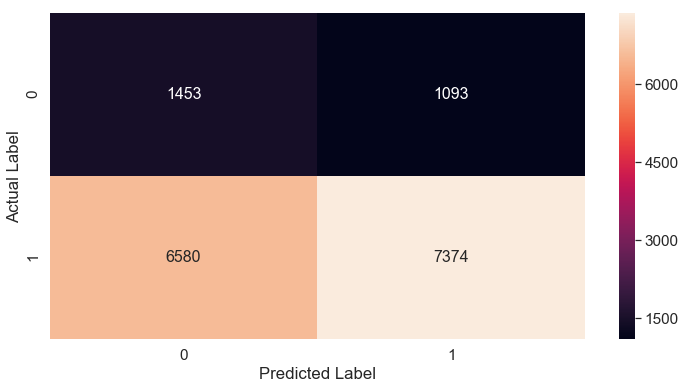

In [214]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

## 2.4.5 Applying Decision Tree using feature importance , SET 5
##### Select 5k best features from features of Set2 using`feature_importances_`, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3

In [215]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,title_tfidf_train, essay_tfidf_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test, price_data_test, quant_test, prev_no_projects_test,title_tfidf_test, essay_tfidf_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33498, 12072) (33498,)
(16500, 12072) (16500,)


In [223]:
#https://datascience.stackexchange.com/questions/31406/tree-decisiontree-feature-importances-numbers-correspond-to-how-features

from sklearn.tree import DecisionTreeClassifier
import pandas as pd

clf = DecisionTreeClassifier()

df_tfidf_5k = pd.DataFrame(X_train_merge.todense())
df_tfidf_5k.columns = feature_names_tfidf

clf = clf.fit(df_tfidf_5k,Y_train)

df_tfidf_5k.head(3)

Warmth  Care_Hunger  History_Civics  Music_Arts  AppliedLearning  \
0     0.0          0.0             0.0         0.0              0.0   
1     0.0          0.0             0.0         0.0              0.0   
2     0.0          0.0             0.0         0.0              0.0   

   SpecialNeeds  Health_Sports  Math_Science  Literacy_Language  Economics  \
0           1.0            0.0           0.0                0.0        0.0   
1           0.0            0.0           0.0                1.0        0.0   
2           1.0            0.0           0.0                1.0        0.0   

   ...  zest  zip  zippers  zone  zoned  zones  zoo  zoom  zooming  zumba  
0  ...   0.0  0.0      0.0   0.0    0.0    0.0  0.0   0.0      0.0    0.0  
1  ...   0.0  0.0      0.0   0.0    0.0    0.0  0.0   0.0      0.0    0.0  
2  ...   0.0  0.0      0.0   0.0    0.0    0.0  0.0   0.0      0.0    0.0  

[3 rows x 12072 columns]

In [293]:
#https://datascience.stackexchange.com/questions/31406/tree-decisiontree-feature-importances-numbers-correspond-to-how-features
tfidf_5k_fimpt = {}
tfidf_5k_fimpt = dict(zip(feature_names_tfidf, clf.feature_importances_))

#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
#Sort the dict in the descending order based on the values in the dictrionary
tfidf_5k_fimpt = sorted(tfidf_5k_fimpt.items(), key=lambda x: x[1], reverse=True)

tfidf_5k_fimpt = tfidf_5k_fimpt[:5000]

#https://stackoverflow.com/questions/12142133/how-to-get-first-element-in-a-list-of-tuples
#To get the first value of a tuple from a list of tuples and removed the features wih zero feature importance value.

tfidf_5k_fimpt = [ seq[0] for seq in tfidf_5k_fimpt if seq[1] > 0.0 ]
df_tfidf_5k = df_tfidf_5k[tfidf_5k_fimpt]

#Similarly we need to do for the test set.
df_5k_test = pd.DataFrame(X_test_merge.todense(),columns = feature_names_tfidf)

df_5k_test = df_5k_test[tfidf_5k_fimpt]

### Finding the best Hyper Parameter - Grid Search

In [306]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

parameters = {'C':[0.5, 0.1, 0.05, 0.01, 0.005],'penalty' :["l1", "l2"]}

clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')

clf.fit(df_tfidf_5k,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

#Summary of the grid search
print('Best Score: ', clf.best_score_)
print('Best Params: ', clf.best_params_)

Best Score:  0.6934122675854124
Best Params:  {'C': 0.5, 'penalty': 'l1'}


### Plot the hyperparameter vs AUC curve using the best parms and best regularisation

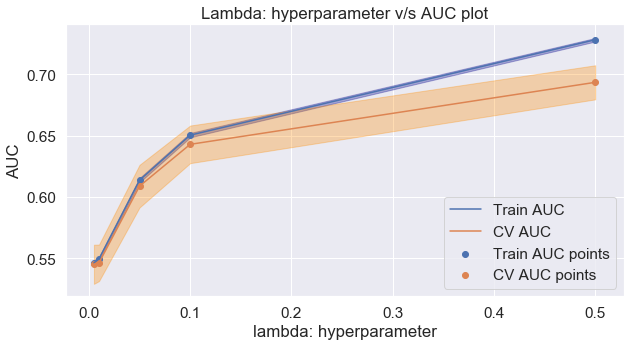

In [305]:
lr = LogisticRegression(penalty='l1')

parameters = {'C':[0.5, 0.1, 0.05, 0.01, 0.005]}

clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')

clf.fit(df_tfidf_5k,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(10,5))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid(True)
plt.show()

### Train the model using the best Hyperparameter

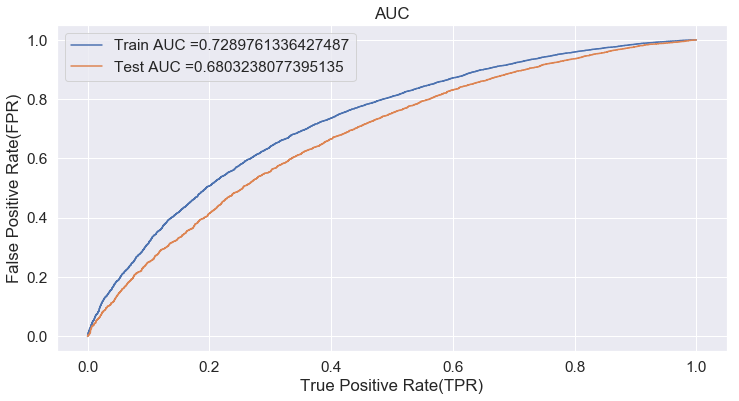

In [307]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(C = 0.5,penalty='l1') #Multinominal Naive Bayes.
lr.fit(df_tfidf_5k, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = lr.predict_proba(df_tfidf_5k)[:,1]       
y_test_pred = lr.predict_proba(df_5k_test)[:,1] 

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [308]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.801
[[ 2584  2584]
 [ 5419 22911]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.86
[[1778  768]
 [6148 7806]]


### Confusion Matrix - Heatmap - Train

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.801


Text(80.5, 0.5, 'Actual Label')

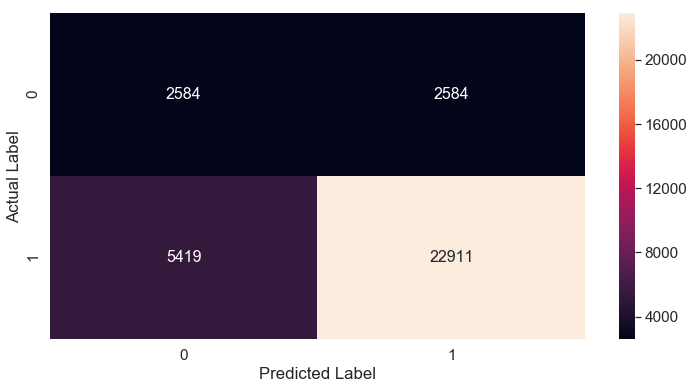

In [309]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix - Heatmap - Test

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.86


Text(80.5, 0.5, 'Actual Label')

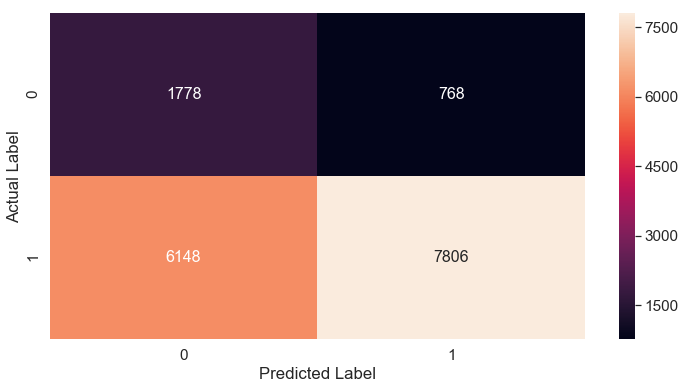

In [310]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

## Conclusion

In [327]:
# Compare all your models using Prettytable library
#http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x_pretty_table = PrettyTable()
x_pretty_table.field_names = ["Model Type","Vectorizer","Lambda","max_depth","min_sample_split","Train-AUC","Test-AUC"]

x_pretty_table.add_row(["Decision Tree","BOW",'',10,500,0.68,0.62])
x_pretty_table.add_row([ "Decision Tree","TFIDF",'',10,500,0.70, 0.62])
x_pretty_table.add_row([ "Decision Tree","AVG W2V",'',5,500,0.66,0.60])
x_pretty_table.add_row([ "Decision Tree","TFIDF W2V",'',10,500,0.59,0.56])
x_pretty_table.add_row([ "LogRegg :Top 5k Features","TFIDF",0.5,'','',0.73,0.68])

print(x_pretty_table)

+--------------------------+------------+--------+-----------+------------------+-----------+----------+
|        Model Type        | Vectorizer | Lambda | max_depth | min_sample_split | Train-AUC | Test-AUC |
+--------------------------+------------+--------+-----------+------------------+-----------+----------+
|      Decision Tree       |    BOW     |        |     10    |       500        |    0.68   |   0.62   |
|      Decision Tree       |   TFIDF    |        |     10    |       500        |    0.7    |   0.62   |
|      Decision Tree       |  AVG W2V   |        |     5     |       500        |    0.66   |   0.6    |
|      Decision Tree       | TFIDF W2V  |        |     10    |       500        |    0.59   |   0.56   |
| LogRegg :Top 5k Features |   TFIDF    |  0.5   |           |                  |    0.73   |   0.68   |
+--------------------------+------------+--------+-----------+------------------+-----------+----------+
